### This is the tutorial of deep learning on FashionMNIST dataset using Pytorch. We will build a Convolutional Neural Network for predicting the classes of Dataset. I am assuming you know the basics of deep leanrning like layer architecture... convolution concepts. Without further ado... Lets start the tutorial.

# **Importing Important Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

import os
from PIL import Image
from torchvision.io import read_image

from google.colab import drive
drive.mount('/content/drive')

data_root = '/content/drive/My Drive/AI4ALL Diabetic Retinopathy Research/Early ML Model/aptos2019-blindness-detection'


Mounted at /content/drive


In [ ]:

from imblearn.over_sampling import SMOTE

INPUT_SIZE = (224, 224)
PATCH_SIZE = (16, 16)
IN_CHANNELS = 3
RANDOM_SEED = 0
TRAIN_SPLIT_FRAC = 0.8
class Aptos(Dataset):
    def __init__(self, base_root: str, train: bool = True) -> None:
        super().__init__()
        self.mode = "train" if train else "val"
        imgs_file = "train_images"
        self.root = os.path.join(base_root, imgs_file)

        self.transform = transforms.Compose([
          transforms.Resize((224,224)),
          transforms.ToTensor(),
          transforms.RandomHorizontalFlip(p=1),
          transforms.RandomRotation(90),
          transforms.Normalize([0.4210, 0.2238, 0.0725], [0.2757, 0.1494, 0.0802]),
        ]
        )
        df =  pd.read_csv(data_root + "/train.csv")
        self.fnames = df["id_code"].to_numpy(dtype = str)
        self.img_labels = df["diagnosis"].to_numpy(dtype=str)
        # print('self.img_labels:',self.img_labels)

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
      # self.img_labels.iloc[idx, 0]
        label = self.img_labels[idx]
        img_path = os.path.join(data_root, "train_images", self.fnames[idx]  + '.png')
        image = Image.open(img_path).convert('RGB')
        # print(image)

        image = self.transform(image)

        return image, int(label)

        #image = read_image(img_path)

    def num_classes():
        return Aptos.NUM_CLASSES

"""test_x = []
test_y = []
for images, labels in test_set:
  test_x.append(images)
  test_y.append(labels)
test_x = np.array(test_x)
test_y = np.array(test_y)"""

'test_x = []\ntest_y = []\nfor images, labels in test_set:\n  test_x.append(images)\n  test_y.append(labels)\ntest_x = np.array(test_x)\ntest_y = np.array(test_y)'

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification

# get aptos class from datasets nb and use same training data code
train_data = pd.read_csv(data_root + "/train.csv")
dataset = Aptos(
    base_root = "/content/drive/My Drive/AI4ALL Diabetic Retinopathy Research/Early ML Model/aptos2019-blindness-detection",
    train=True
)
train_set, test_set = torch.utils.data.random_split(dataset, [int(len(dataset)*TRAIN_SPLIT_FRAC), len(dataset) - int(len(dataset)*TRAIN_SPLIT_FRAC)])

train_x = []
train_y = []
for images, labels in train_set:
  train_x.append(images)
  train_y.append(labels)
train_x = np.array(train_x)
train_y = np.array(train_y)
print(train_y)

[0 0 0 ... 4 0 3]


In [ ]:
from collections import Counter
from sklearn.datasets import make_classification

# get aptos class from datasets nb and use same training data code
train_data = pd.read_csv(data_root + "/train.csv")
dataset = Aptos(
    base_root = "/content/drive/My Drive/AI4ALL Diabetic Retinopathy Research/Early ML Model/aptos2019-blindness-detection",
    train=True
)
train_set, test_set = torch.utils.data.random_split(dataset, [int(len(dataset)*TRAIN_SPLIT_FRAC), len(dataset) - int(len(dataset)*TRAIN_SPLIT_FRAC)])

train_x = []
train_y = []
for images, labels in train_set:
  train_x.append(images)
  train_y.append(labels)
train_x = np.array(train_x)
train_y = np.array(train_y)

print(train_y)

[0 0 0 ... 2 2 0]


In [ ]:
from collections import Counter
from sklearn.datasets import make_classification

# get aptos class from datasets nb and use same training data code
train_data = pd.read_csv(data_root + "/train.csv")
dataset = Aptos(
    base_root = "/content/drive/My Drive/AI4ALL Diabetic Retinopathy Research/Early ML Model/aptos2019-blindness-detection",
    train=True
)
train_set, test_set = torch.utils.data.random_split(dataset, [int(len(dataset)*TRAIN_SPLIT_FRAC), len(dataset) - int(len(dataset)*TRAIN_SPLIT_FRAC)])


In [ ]:
type(train_set)

In [ ]:
with open('train_x.npy', 'wb') as f:
  np.save(f, train_x)

with open('train_y.npy', 'wb') as f:
  np.save(f, train_y)

In [ ]:
with open('train_x.npy', 'rb') as f:
  train_x = np.load(f)

with open('train_y.npy', 'rb') as f:
  train_y = np.load(f)

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
print('before smote')
counter = Counter(train_y)
print('Before', counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(train_x.reshape(train_x.shape[0],-1), train_y)
print('after smote')
# X_test_sm, y_test_sm = smt.fit_resample(test_x.reshape(test_x.shape[0],-1), test_y)
counter = Counter(y_train_sm)
print('After', counter)
print(X_train_sm)
X_train_sm_reshaped = X_train_sm.reshape(-1, 3, 224, 224)
"""train_set = []
for i in range(len(X_train_sm)):
  train_set.append((X_train_sm, y_train_sm))
train_set = torch.from_numpy(np.array(train_set))
print(train_set.shape())"""

# kleef's code
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        return image, label


before smote
Before Counter({0: 1466, 2: 802, 1: 282, 4: 226, 3: 153})


In [ ]:
train_dataset = CustomDataset(X_train_sm_reshaped, y_train_sm)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

test_loader = DataLoader(test_set, batch_size=8, shuffle=False)

print(len(train_loader))

920


### We have 10 types of clothes in FashionMNIST dataset.


> Making a method that return the name of class for the label number.
ex. if the label is 5, we return Sandal.



In [ ]:
train_x = []
train_y = []
for images, labels in train_set:
  train_x.append(images)
  train_y.append(labels)
  break
train_x = np.array(train_x)
train_y = np.array(train_y)

counter = Counter(train_y)
print('Before', counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(train_x.reshape(train_x.shape[0], -1), train_y)
# X_test_sm, y_test_sm = smt.fit_resample(test_x.reshape(test_x.shape[0],-1), test_y)
counter = Counter(y_train_sm)
print('After', counter)

train_set = []
for i in range(len(X_train_sm)):
  train_set.append((X_train_sm, y_train_sm))
train_set = torch.from_numpy(np.array(train_set))
print(train_set.shape())

Before Counter({0: 1})


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [ ]:
train_x.shape[0]

1

In [ ]:
np.array(train_x).shape

(1, 3, 224, 224)

In [ ]:
train_x = []
train_y = []
for images, labels in train_set:
  train_x.append(images)
  train_y.append(labels)

0

In [ ]:
# get aptos class from datasets nb and use same training data code
train_data = pd.read_csv(data_root + "/train.csv")
dataset = Aptos(
    base_root = "/content/drive/My Drive/AI4ALL Diabetic Retinopathy Research/Early ML Model/aptos2019-blindness-detection",
    train=True
)
train_set, test_set = torch.utils.data.random_split(dataset, [int(len(dataset)*TRAIN_SPLIT_FRAC), len(dataset) - int(len(dataset)*TRAIN_SPLIT_FRAC)])

train_loader = DataLoader(train_set, batch_size=16, shuffle=True)

test_loader = DataLoader(test_set, batch_size=16, shuffle=False)

In [ ]:

# Focal Loss - add before transforms
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        loss = (self.alpha[targets] * (1 - pt) ** self.gamma * ce_loss).mean()
        return loss
# alpha = 0.5, gamma = 2.1

0
2


2
0


2
3


3
0


0


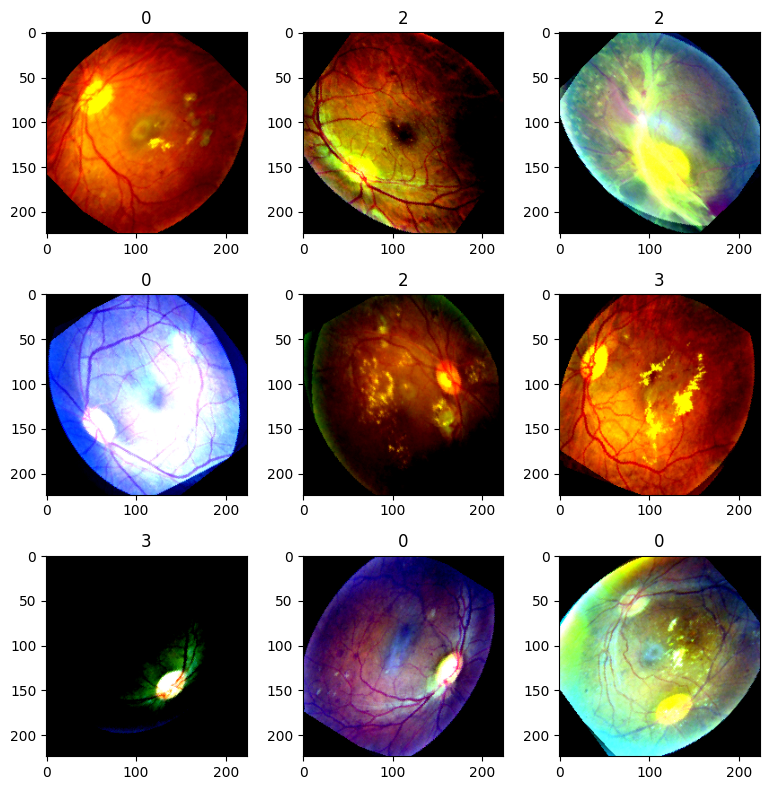

In [ ]:
def output_label(label):
    output_mapping = {
        0: "No_DR",
        1: "Mild",
        2: "Moderate",
        3: "Severe",
        4: "PDR",
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data.iloc[sample_idx]
    print(label)
    figure.add_subplot(rows, cols, i)
    img_array = np.array(img)
    imgs, labels = next(iter(train_loader))
    # print(imgs[0], labels)
    plt.title(label)
    figure.tight_layout()
    # permute the dimensions so you have image shapes (224,224,3) instead of (3,224,224)
    # plt.imshow(imgs[0].permute(1,2,0))
    plt.imshow(imgs[0].permute(2,1,0))
plt.show()

### Playing with data and displaying some images using matplotlib imshow() method.





In [ ]:
a = next(iter(train_loader))
a[0].size()

image, label = next(iter(train_loader))
plt.imshow(imgs[0].permute(1,2,0), cmap="gray")
print(label)

demo_loader = torch.utils.data.DataLoader(train_set, batch_size=16)

batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(len(images), len(labels))

grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(label, end=", ")

torch.Size([10, 3, 224, 224])

## Building a CNN


*   Make a model class (FashionCNN in our case)
    * It inherit nn.Module class that is a super class for all the neural networks in Pytorch.
* Our Neural Net has following layers:
    * Two Sequential layers each consists of following layers-
        * Convolution layer that has kernel size of 3 * 3, padding = 1 (zero_padding) in 1st layer and padding = 0 in second one. Stride of 1 in both layer.
        * Batch Normalization layer.
        * Acitvation function: ReLU.
        * Max Pooling layer with kernel size of 2 * 2 and stride 2.
     * Flatten out the output for dense layer(a.k.a. fully connected layer).
     * 3 Fully connected layer  with different in/out features.
     * 1 Dropout layer that has class probability p = 0.25.
  
     * All the functionaltiy is given in forward method that defines the forward pass of CNN.
     * Our input image is changing in a following way:
        * First Convulation layer : input: 28 \* 28 \* 3, output: 28 \* 28 \* 32
        * First Max Pooling layer : input: 28 \* 28 \* 32, output: 14 \* 14 \* 32
        * Second Conv layer : input : 14 \* 14 \* 32, output: 12 \* 12 \* 64
        * Second Max Pooling layer : 12 \* 12 \* 64, output:  6 \* 6 \* 64
    * Final fully connected layer has 10 output features for 10 types of clothes.

> Lets implementing the network...





In [ ]:
class AptosCNN(nn.Module):

    def __init__(self):
        super(AptosCNN, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3, padding=1),
            nn.BatchNorm2d(5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc1 = nn.Linear(in_features=30250, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)

        return out


### Making a model of our CNN class

*   Creating a object(model in the code)
*   Transfering it into GPU if available.
*  Defining a Loss function. we're using CrossEntropyLoss() here.
*  Using Adam algorithm for optimization purpose.



In [ ]:
model = AptosCNN()

error = nn.CrossEntropyLoss()
#error = FocalLoss(alpha=0.5, gamma=2.1)
learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

AptosCNN(
  (layer1): Sequential(
    (0): Conv2d(3, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=30250, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


## Training a network and Testing it on test dataset

In [ ]:
!pip install torchmetrics

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

tensor([0, 4, 0, 3, 2, 3, 3, 0])
tensor([4, 3, 2, 1, 3, 1, 1, 1])
tensor([2, 0, 2, 3, 3, 0, 2, 4])
tensor([3, 0, 0, 3, 4, 0, 3, 1])
tensor([1, 3, 4, 4, 0, 4, 3, 3])
tensor([4, 1, 4, 2, 4, 3, 4, 1])
tensor([0, 1, 2, 3, 0, 0, 4, 3])
tensor([1, 3, 2, 4, 4, 2, 3, 1])
tensor([1, 2, 2, 2, 0, 3, 1, 1])
tensor([1, 0, 0, 2, 3, 3, 2, 0])
tensor([2, 1, 1, 4, 2, 4, 2, 3])
tensor([3, 3, 1, 1, 3, 2, 0, 3])
tensor([0, 4, 4, 2, 1, 3, 3, 0])
tensor([4, 4, 0, 2, 2, 3, 1, 0])
tensor([2, 2, 2, 3, 1, 3, 4, 2])
tensor([4, 0, 0, 2, 4, 1, 0, 0])
tensor([4, 3, 3, 3, 4, 1, 3, 1])
tensor([2, 2, 2, 2, 2, 3, 0, 0])
tensor([2, 2, 2, 2, 1, 4, 0, 0])
tensor([1, 2, 1, 1, 2, 4, 0, 1])
tensor([3, 2, 0, 4, 0, 2, 4, 2])
tensor([3, 2, 4, 0, 3, 0, 4, 0])
tensor([2, 0, 2, 0, 0, 4, 4, 3])
tensor([3, 2, 3, 3, 2, 4, 4, 1])
tensor([0, 2, 0, 3, 4, 0, 4, 2])
tensor([2, 4, 3, 0, 3, 4, 3, 2])
tensor([0, 3, 1, 2, 3, 4, 2, 0])
tensor([3, 3, 3, 2, 1, 0, 2, 0])
tensor([0, 4, 0, 0, 3, 4, 1, 4])
tensor([3, 0, 0, 3, 1, 2, 4, 3])
tensor([0,

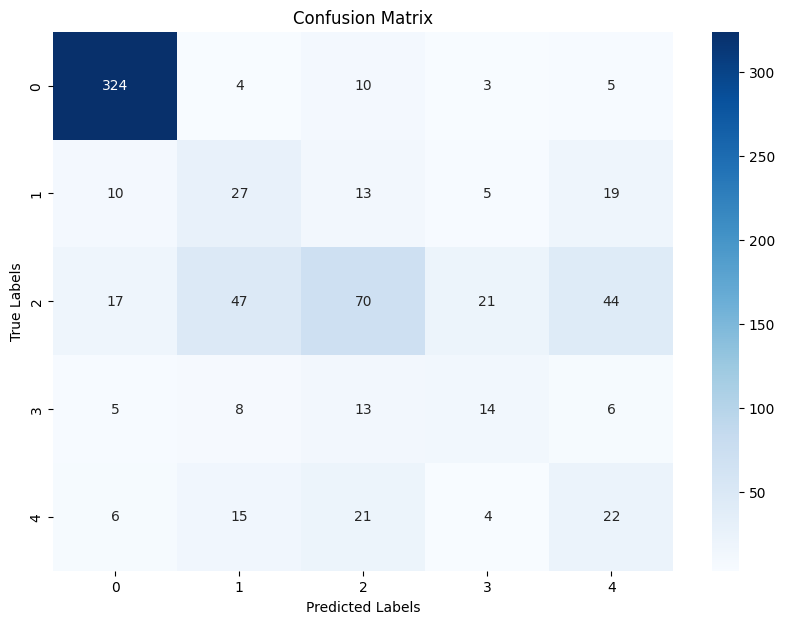

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       346
           1       0.27      0.36      0.31        74
           2       0.55      0.35      0.43       199
           3       0.30      0.30      0.30        46
           4       0.23      0.32      0.27        68

    accuracy                           0.62       733
   macro avg       0.45      0.46      0.44       733
weighted avg       0.64      0.62      0.62       733



In [ ]:
num_epochs = 10
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
predictions_list = []
labels_list = []
"""train_fprs, train_tprs, train_auc_scores = [], [], []
valid_fprs, valid_tprs, valid_auc_scores = [], [], []"""
train_aurocs, valid_aurocs = [], []
train_f1s, valid_f1s = [], []
"""train_tp, train_tn, train_fp, train_fn = [], [], [], []
valid_tp, valid_tn, valid_fp, valid_fn = [], [], [], []"""

# Oversample with SMOTE and random undersample for imbalanced dataset
from PIL import Image, ImageFile
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchmetrics
from torchmetrics.classification import MulticlassAUROC, MulticlassF1Score

ImageFile.LOAD_TRUNCATED_IMAGES = True
num_classes = 5

metric_auroc = MulticlassAUROC(num_classes=num_classes, average="macro", thresholds=None)
metric_f1 = MulticlassF1Score(num_classes=num_classes, average="macro")
for epoch in range(num_epochs):
    all_train_labels, all_train_preds = [], []
    for images, labels in train_loader:
        """data, labels = SMOTE().fit_resample(train_set, labels)"""
        # images = Variable(images)
        # labels = Variable(labels)

        # Forward pass
        outputs = model(images)
        loss = error(outputs, labels)
        print(labels)

        # Zero gradients, backward pass, and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        count += 1

# Example of appending metrics
        #train_aurocs.append(metric_auroc(outputs, labels))
        #train_f1s.append(metric_f1(outputs, labels))
        """metric = MulticlassAUROC(num_classes=5, average="macro", thresholds=None)
        train_aurocs.append(metric(outputs, labels))
        f1_metric = MulticlassF1Score(num_classes=5, average="macro")
        train_f1s.append(f1_metric(outputs, labels))"""

        # Print loss after every 50 iterations
        if count % 50 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Iteration [{count}] Loss: {loss.item():.4f}')
    # Testing the model after each epoch
    model.eval()  # Set model to evaluation mode
    test_loss = 0
    total = 0
    correct = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():  # No need to calculate gradients during testing
        for images, labels in test_loader:
            # Transfer images and labels to GPU if available (if needed)

            # Forward pass
            outputs = model(images)
            loss = error(outputs, labels)
            test_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            num_classes = 5

# Initialize metrics with the correct number of classes
            #metric_auroc = MulticlassAUROC(num_classes=num_classes, average="macro", thresholds=None)
            #metric_f1 = MulticlassF1Score(num_classes=num_classes, average="macro")

# Example of appending metrics
            #valid_aurocs.append(metric_auroc(outputs, labels))
            #valid_f1s.append(metric_f1(outputs, labels))

            """metric = MulticlassAUROC(num_classes=5, average="macro", thresholds=None)
            valid_aurocs.append(metric(outputs, labels))
            f1_metric = MulticlassF1Score(num_classes=5, average="macro")
            valid_f1s.append(f1_metric(outputs, labels))"""

            predictions_list.append(predicted)
            labels_list.append(labels)
            loss_list.append(loss.item())
            iteration_list.append(total)
            accuracy_list.append((predicted == labels).sum().item())

    # Average test loss and accuracy
        avg_test_loss = test_loss / len(test_loader.dataset)
        accuracy = correct / total * 100

        print(f'Test Loss: {avg_test_loss:.4f}, Accuracy: {accuracy:.2f}%')

    # model.train()  # Set model back to training mode

# Print final accuracy after all epochs (optional)
print(f'Final Accuracy: {accuracy:.2f}%')

conf_matrix = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=range(5), yticklabels=range(5))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

    # Optional: Print classification report
report = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(5)])
print("Classification Report:\n", report)

In [ ]:
print(iteration_list)
print(loss_list)
print(predictions_list)
print(labels_list)

[64, 128, 192, 256, 320, 384, 448, 512, 576, 640, 704, 733]
[0.6970780491828918, 0.7631585001945496, 0.9117576479911804, 0.5960301756858826, 0.9325965046882629, 0.9546139240264893, 0.9105864763259888, 0.9785478711128235, 0.8695141077041626, 0.8702582120895386, 0.8222299814224243, 0.864911675453186]
[tensor([2, 0, 1, 0, 2, 0, 3, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
        2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 2, 3, 2, 0, 3, 2,
        0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2,
        2, 2, 0, 2, 3, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0, 1, 2,
        0, 2, 2, 0, 3, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0]), tensor([0, 2, 0, 0, 0, 3, 1, 0, 2, 3, 2, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 3, 2]), tensor([0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0

### Visualizing the Loss and Accuracy with Iterations


In [ ]:
plt.plot(iteration_list, train_aurocs)
plt.xlabel("No. of Iteration")
plt.ylabel("Train Aurocs")
plt.title("Iterations vs Train Aurocs")
plt.show()

plt.plot(iteration_list, train_f1s)
plt.xlabel("No. of Iteration")
plt.ylabel("Train F1 Score")
plt.title("Iterations vs Train F1 Score")
plt.show()

In [ ]:
plt.plot(iteration_list, valid_aurocs)
plt.xlabel("No. of Iteration")
plt.ylabel("Test Aurocs")
plt.title("Iterations vs Test Aurocs")
plt.show()

plt.plot(iteration_list, valid_f1s)
plt.xlabel("No. of Iteration")
plt.ylabel("Test F1 Score")
plt.title("Iterations vs Test F1 Score")
plt.show()

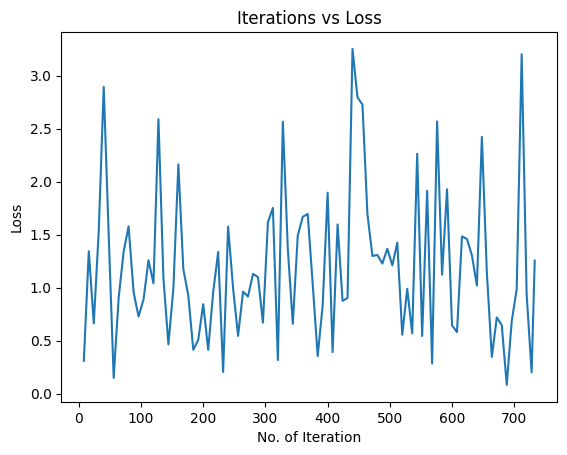

In [ ]:
"""loss_sum = 0
for i in iteration_list:
  loss_sum += loss_list[i]
avg_loss = loss_sum/len(loss_list)
print(avg_loss)
"""
plt.plot(iteration_list, loss_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

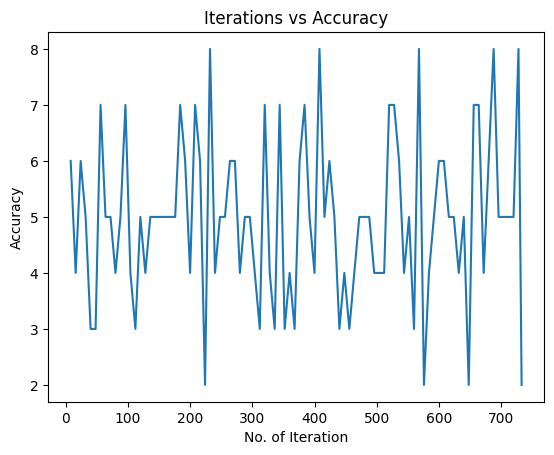

In [ ]:
"""acc_sum = 0
for i in iteration_list:
  acc_sum += accuracy_list[i]
avg_acc = acc_sum/len(accuracy_list)
print(avg_acc)"""

plt.plot(iteration_list, accuracy_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

### Looking the Accuracy in each class of FashionMNIST dataset

In [ ]:
class_correct = [0. for _ in range(5)] #10
total_correct = [0. for _ in range(5)] # 10

with torch.no_grad():
    for images, labels in test_loader:
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()

        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1

for i in range(5):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Accuracy of No_DR: 92.20%
Accuracy of Mild: 43.24%
Accuracy of Moderate: 33.67%
Accuracy of Severe: 23.91%
Accuracy of PDR: 32.35%


### Printing the Confusion Matrix